## Problem: Minimum obstacle removal to reach corner
LeetCode: 2290
https://leetcode.com/problems/minimum-obstacle-removal-to-reach-corner/description/

You are given a 0-indexed 2D integer array grid of size m x n. Each cell has one of two values:

0 represents an empty cell,
1 represents an obstacle that may be removed.
You can move up, down, left, or right from and to an empty cell.

Return the minimum number of obstacles to remove so you can move from the upper left corner (0, 0) to the lower right corner (m - 1, n - 1).

 

Example 1:

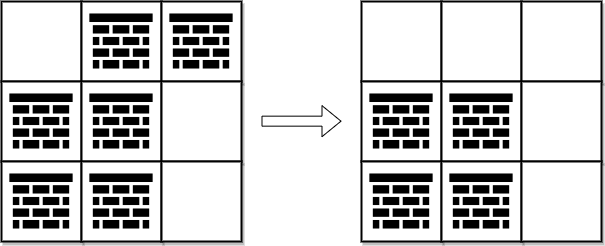

    Input: grid = [[0,1,1],[1,1,0],[1,1,0]]
    Output: 2
    Explanation: We can remove the obstacles at (0, 1) and (0, 2) to create a path from (0, 0) to (2, 2).
    It can be shown that we need to remove at least 2 obstacles, so we return 2.
    Note that there may be other ways to remove 2 obstacles to create a path.
Example 2:


    Input: grid = [[0,1,0,0,0],[0,1,0,1,0],[0,0,0,1,0]]
    Output: 0
    Explanation: We can move from (0, 0) to (2, 4) without removing any obstacles, so we return 0.
 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 105
    2 <= m * n <= 105
    grid[i][j] is either 0 or 1.
    grid[0][0] == grid[m - 1][n - 1] == 0

In [54]:
import heapq
def minimumObstacles(grid):
    m = len(grid)
    n = len(grid[0])
    minObstacle = [[float("inf")] * n for _ in range(m)]
    visited = [[False]* n for _ in range(m)]
    minObstacle[0][0] = 0
    minHeap = []
    heapq.heappush(minHeap, (0,0,0))
    while minHeap:
        curObs, curx, cury = heapq.heappop(minHeap)
        visited[curx][cury] = True
        if curObs > minObstacle[curx][cury]:
            continue
        nebrs =  getNebrs(curx, cury, grid)
        for r, c in nebrs:
            nextObs = grid[r][c]
            if nextObs + curObs < minObstacle[r][c]:
                minObstacle[r][c] = nextObs + curObs
                heapq.heappush(minHeap, (minObstacle[r][c], r, c))
    return minObstacle[-1][-1]
        

def getNebrs(row, col, grid):
    nbrs = []
    if row > 0:
        nbrs.append((row-1, col))
    if row < len(grid) - 1:
        nbrs.append((row+1, col))
    if col > 0:
        nbrs.append((row, col-1))
    if col < len(grid[0]) - 1:
        nbrs.append((row, col+1))
    return nbrs
        


In [55]:
grid = [[0,1,1],[1,1,0],[1,1,0]]
minimumObstacles(grid)

2

In [56]:
grid = [[0,1,0,0,0],[0,1,0,1,0],[0,0,0,1,0]]
minimumObstacles(grid)

0